In [ ]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Define the URL to download the dataset #https://www.muratkoklu.com/datasets/
dataset_url = "https://www.muratkoklu.com/datasets/vtdhnd12.php"

# Download the dataset to a temporary file
response = requests.get(dataset_url)
with open("pistachio_dataset.zip", "wb") as f:
    f.write(response.content)

# Extract the dataset from the ZIP file
with zipfile.ZipFile("pistachio_dataset.zip", "r") as zip_ref:
    zip_ref.extractall()

# Delete the temporary ZIP file
os.remove("pistachio_dataset.zip")

# Define the source directories for the downloaded images
kirmizi_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/"
siirt_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/Siirt_Pistachio/"

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Create separate arrays for cat and dog images
cat_images = []
dog_images = []

# # Define the directories for train, test, and validation sets for both categories
# train_dir_kirmizi = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/kirmizi"
# test_dir_kirmizi = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/kirmizi"
# validation_dir_kirmizi = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/kirmizi"

# train_dir_siirt = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/siirt"
# test_dir_siirt = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/siirt"
# validation_dir_siirt = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/siirt"

# # Create directories for train, test, and validation sets for both categories
# for directory in [train_dir_kirmizi, test_dir_kirmizi, validation_dir_kirmizi,
#                   train_dir_siirt, test_dir_siirt, validation_dir_siirt]:
#     if not os.path.exists(directory):
#         os.makedirs(directory)

# # Define the number of images to copy for each set
# train_images = 70
# test_images = 10
# validation_images = 20

# # Copy Kirmizi images
# kirmizi_image_files = os.listdir(kirmizi_dir)
# np.random.shuffle(kirmizi_image_files)

# # Train set
# for i in range(train_images):
#     source_path = os.path.join(kirmizi_dir, kirmizi_image_files[i])
#     destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/kirmizi/", kirmizi_image_files[i])
#     shutil.copy2(source_path, destination_path)

# # Test set
# for i in range(train_images, train_images + test_images):
#     source_path = os.path.join(kirmizi_dir, kirmizi_image_files[i])
#     destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/kirmizi/", kirmizi_image_files[i])
#     shutil.copy2(source_path, destination_path)

# # Validation set
# for i in range(train_images + test_images, train_images + test_images + validation_images):
#     source_path = os.path.join(kirmizi_dir, kirmizi_image_files[i])
#     destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/kirmizi/", kirmizi_image_files[i])
#     shutil.copy2(source_path, destination_path)

# # Copy Siirt images
# siirt_image_files = os.listdir(siirt_dir)
# np.random.shuffle(siirt_image_files)

# # Train set
# for i in range(train_images):
#     source_path = os.path.join(siirt_dir, siirt_image_files[i])
#     destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/siirt/", siirt_image_files[i])
#     shutil.copy2(source_path, destination_path)

# # Test set
# for i in range(train_images, train_images + test_images):
#     source_path = os.path.join(siirt_dir, siirt_image_files[i])
#     destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/siirt/", siirt_image_files[i])
#     shutil.copy2(source_path, destination_path)

# # Validation set
# for i in range(train_images + test_images, train_images + test_images + validation_images):
#     source_path = os.path.join(siirt_dir, siirt_image_files[i])
#     destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/siirt/", siirt_image_files[i])
#     shutil.copy2(source_path, destination_path)
    


# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Create separate arrays for cat and dog images
cat_images = []
dog_images = []

# Collect 100 images for each class
for i, label in enumerate(train_labels):
    if label == 0:  # Cat class
        if len(cat_images) < 100:
            cat_images.append(train_images[i])
    else:  # Dog class
        if len(dog_images) < 100:
            dog_images.append(train_images[i])

# Save the cat images
for i, image in enumerate(cat_images):
    cv2.imwrite(f"cat_image_{i+1}.jpg", image)

# Save the dog images
for i, image in enumerate(dog_images):
    cv2.imwrite(f"dog_image_{i+1}.jpg", image)


import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the cat and dog images
cat_images = []
dog_images = []

for i in range(100):
    cat_image = cv2.imread(f"cat_image_{i+1}.jpg")
    dog_image = cv2.imread(f"dog_image_{i+1}.jpg")

    cat_images.append(cat_image)
    dog_images.append(dog_image)

# Apply image processing techniques to cat images
for cat_image in cat_images:
    # Convert to grayscale
    grayscale_cat_image = cv2.cvtColor(cat_image, cv2.COLOR_BGR2GRAY)

    # Resize
    resized_cat_image = cv2.resize(grayscale_cat_image, (224, 224))

    # Blur
    blurred_cat_image = cv2.GaussianBlur(resized_cat_image, (5, 5), 0)

    # Edge detection
    edges_cat_image = cv2.Canny(blurred_cat_image, 50, 150)

    # Display processed cat image
    plt.imshow(edges_cat_image)
    plt.title("Processed Cat Image")
    plt.show()

# Apply image processing techniques to dog images
for dog_image in dog_images:
    # Convert to grayscale
    grayscale_dog_image = cv2.cvtColor(dog_image, cv2.COLOR_BGR2GRAY)

    # Resize
    resized_dog_image = cv2.resize(grayscale_dog_image, (224, 224))

    # Blur
    blurred_dog_image = cv2.GaussianBlur(resized_dog_image, (5, 5), 0)

    # Edge detection
    edges_dog_image = cv2.Canny(blurred_dog_image, 50, 150)

    # Display processed dog image
    plt.imshow(edges_dog_image)
    plt.title("Processed Dog Image")
    plt.show()

# Calculate the histograms for both cat and dog images
cat_histogram = cv2.calcHist([grayscale_cat_image], [0], None, [256], [0, 256])
dog_histogram = cv2.calcHist([grayscale_dog_image], [0], None, [256], [0, 256])

# Calculate the Bhattacharyya distance between the cat and dog histograms
distance = cv2.compareHist(cat_histogram, dog_histogram, cv2.HISTCMP_BHATTACHARYYA)

# Classify the image based on the distance
if distance < 0.5:
    classification = 'cat'
else:
    classification = 'dog'

# Print the classification
print("Image classification:", classification)

# Display the histograms
plt.plot(cat_histogram, label='Cat Histogram')
plt.plot(dog_histogram, label='Dog Histogram')
plt.legend()
plt.title('Histogram of Grayscale Images')
plt.show()

import matplotlib.pyplot as plt

# Define the data to plot
labels = ['Cat', 'Dog']  # Classes
data = [100, 50]  # Number of images in each class

# Create a pie chart
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Image Classification Distribution')
plt.show()

## combine
import cv2
import tensorflow as tf
import os

# Download the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.cifar10.load_data()

# Create separate arrays for cat and dog images
cat_images = []
dog_images = []

# Collect 100 images for each class
for i, label in enumerate(train_labels):
    if label == 0:  # Cat class
        if len(cat_images) < 100:
            cat_images.append(train_images[i])
    else:  # Dog class
        if len(dog_images) < 100:
            dog_images.append(train_images[i])

# Create the '04_cats_dogs' folder if it doesn't exist
if not os.path.exists('04_cats_dogs'):
    os.makedirs('04_cats_dogs')

# Create subfolders for cat and dog images
if not os.path.exists('04_cats_dogs/cat_images'):
    os.makedirs('04_cats_dogs/cat_images')

if not os.path.exists('04_cats_dogs/dog_images'):
    os.makedirs('04_cats_dogs/dog_images')

# Save the cat images
for i, image in enumerate(cat_images):
    cv2.imwrite(f"04_cats_dogs/cat_images/cat_image_{i+1}.jpg", image)

# Save the dog images
for i, image in enumerate(dog_images):
    cv2.imwrite(f"04_cats_dogs/dog_images/dog_image_{i+1}.jpg", image)

import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Check if the '04_cats_dogs' folder exists
if not os.path.exists('04_cats_dogs'):
    # Create the '04_cats_dogs' folder if it doesn't exist
    os.makedirs('04_cats_dogs')

# Load the downloaded cat and dog images
cat_images = []
dog_images = []

for filename in os.listdir('04_cats_dogs/cat_images'):
    cat_image = cv2.imread(os.path.join('04_cats_dogs/cat_images', filename))
    cat_images.append(cat_image)

for filename in os.listdir('04_cats_dogs/dog_images'):
    dog_image = cv2.imread(os.path.join('04_cats_dogs/dog_images', filename))
    dog_images.append(dog_image)

# Calculate the number of cat and dog images
num_cat_images = len(cat_images)
num_dog_images = len(dog_images)

# Apply image processing techniques to cat and dog images
for cat_image in cat_images:
    # Convert to grayscale
    grayscale_cat_image = cv2.cvtColor(cat_image, cv2.COLOR_BGR2GRAY)

    # Resize
    resized_cat_image = cv2.resize(grayscale_cat_image, (224, 224))

    # Blur
    blurred_cat_image = cv2.GaussianBlur(resized_cat_image, (5, 5), 0)

    # Edge detection
    edges_cat_image = cv2.Canny(blurred_cat_image, 50, 150)

# Apply image processing techniques to dog and cat images
for dog_image in dog_images:
    # Convert to grayscale
    grayscale_dog_image = cv2.cvtColor(dog_image, cv2.COLOR_BGR2GRAY)

    # Resize
    resized_dog_image = cv2.resize(grayscale_dog_image, (224, 224))

    # Blur
    blurred_dog_image = cv2.GaussianBlur(resized_dog_image, (5, 5), 0)

    # Edge detection
    edges_dog_image = cv2.Canny(blurred_dog_image, 50, 150)

# Calculate histograms for both cat and dog images
cat_histogram = cv2.calcHist([grayscale_cat_image], [0], None, [256], [0, 256])
dog_histogram = cv2.calcHist([grayscale_dog_image], [0], None, [256], [0, 256])

# Calculate Bhattacharyya distance between cat and dog histograms
distance = cv2.compareHist(cat_histogram, dog_histogram, cv2.HISTCMP_BHATTACHARYYA)

# Classify images based on distance threshold
classification = 'cat' if distance < 0.5 else 'dog'

# Print classification and image counts
print("Image classification:", classification)
print("Number of cat images:", num_cat_images)
print("Number of dog images:", num_dog_images)

# Display histograms
plt.plot(cat_histogram, label='Cat Histogram')
plt.plot(dog_histogram, label='Dog Histogram')
plt.legend()
plt.title('Histogram of Grayscale Images')
plt.show()



In [ ]:
import tensorflow as tf
import requests, zipfile, shutil, os
requests.packages.urllib3.disable_warnings()
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the URL to download the dataset #https://www.muratkoklu.com/datasets/
dataset_url = "https://www.muratkoklu.com/datasets/vtdhnd12.php"

# Download the dataset to a temporary file
response = requests.get(dataset_url)
with open("pistachio_dataset.zip", "wb") as f:
    f.write(response.content)

# Extract the dataset from the ZIP file
with zipfile.ZipFile("pistachio_dataset.zip", "r") as zip_ref:
    zip_ref.extractall()

# Delete the temporary ZIP file
os.remove("pistachio_dataset.zip")

# Define the source directories for the downloaded images
kirmizi_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/Kirmizi_Pistachio/"
siirt_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/Siirt_Pistachio/"

# Define the directories for train, test, and validation sets for both categories
train_dir_kirmizi = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/kirmizi"
test_dir_kirmizi = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/kirmizi"
validation_dir_kirmizi = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/kirmizi"

train_dir_siirt = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/siirt"
test_dir_siirt = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/siirt"
validation_dir_siirt = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/siirt"

# Create directories for train, test, and validation sets for both categories
for directory in [train_dir_kirmizi, test_dir_kirmizi, validation_dir_kirmizi,
                  train_dir_siirt, test_dir_siirt, validation_dir_siirt]:
    if not os.path.exists(directory):
        os.makedirs(directory)

# Define the number of images to copy for each set
train_images = 70
test_images = 10
validation_images = 20

# Copy Kirmizi images
kirmizi_image_files = os.listdir(kirmizi_dir)
np.random.shuffle(kirmizi_image_files)

# Train set
for i in range(train_images):
    source_path = os.path.join(kirmizi_dir, kirmizi_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/kirmizi/", kirmizi_image_files[i])
    shutil.copy2(source_path, destination_path)

# Test set
for i in range(train_images, train_images + test_images):
    source_path = os.path.join(kirmizi_dir, kirmizi_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/kirmizi/", kirmizi_image_files[i])
    shutil.copy2(source_path, destination_path)

# Validation set
for i in range(train_images + test_images, train_images + test_images + validation_images):
    source_path = os.path.join(kirmizi_dir, kirmizi_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/kirmizi/", kirmizi_image_files[i])
    shutil.copy2(source_path, destination_path)

# Copy Siirt images
siirt_image_files = os.listdir(siirt_dir)
np.random.shuffle(siirt_image_files)

# Train set
for i in range(train_images):
    source_path = os.path.join(siirt_dir, siirt_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/siirt/", siirt_image_files[i])
    shutil.copy2(source_path, destination_path)

# Test set
for i in range(train_images, train_images + test_images):
    source_path = os.path.join(siirt_dir, siirt_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/siirt/", siirt_image_files[i])
    shutil.copy2(source_path, destination_path)

# Validation set
for i in range(train_images + test_images, train_images + test_images + validation_images):
    source_path = os.path.join(siirt_dir, siirt_image_files[i])
    destination_path = os.path.join("./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/siirt/", siirt_image_files[i])
    shutil.copy2(source_path, destination_path)


# Define the path to the downloaded dataset
train_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/train/"
test_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/test/"
validation_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/validation/"

# Image data preprocessing
train_imagerescale = ImageDataGenerator(rescale=1./255) ### RGB to convert 0,1
test_imagerescale = ImageDataGenerator(rescale=1./255)  ### RGB to convert 0,1
validation_imagerescale = ImageDataGenerator(rescale=1./255)  ### RGB to convert 0,1

train_images = train_imagerescale.flow_from_directory(
    train_dir,
    target_size = (128, 128),
    class_mode = 'binary'
)

test_images = test_imagerescale.flow_from_directory(
    test_dir,
    target_size = (128, 128),
    class_mode = 'binary'
)

validation_images = validation_imagerescale.flow_from_directory(
    validation_dir,
    target_size = (128, 128),
    class_mode = 'binary'
)
print(f"Print the class binary: {train_images.class_indices}")

import cv2
import os

# Define the input directory
input_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/"

# Create an empty list to store processed images
processed_images = []

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    # Check if the file is an image
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Read the image file
        image = cv2.imread(os.path.join(input_dir, filename))

        # Convert the image to grayscale
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Resize the image to a smaller size
        resized_image = cv2.resize(grayscale_image, (256, 256))

        # Apply edge detection to the image
        edges = cv2.Canny(resized_image, 50, 150)

        # Append the processed image to the list
        processed_images.append(edges)

# Save the processed images to a new folder
output_dir = "./processed_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i, image in enumerate(processed_images):
    save_path = os.path.join(output_dir, f"processed_image_{i}.jpg")
    cv2.imwrite(save_path, image)


In [ ]:
# !pip install opencv-python
import cv2
import os

# Define the input directory
input_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/"

# Create an empty list to store processed images
processed_images = []

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    # Check if the file is an image
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Read the image file
        image = cv2.imread(os.path.join(input_dir, filename))

        # Convert the image to grayscale
        grayscale_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # Resize the image to a smaller size
        resized_image = cv2.resize(grayscale_image, (256, 256))

        # Apply edge detection to the image
        edges = cv2.Canny(resized_image, 50, 150)

        # Append the processed image to the list
        processed_images.append(edges)

# Save the processed images to a new folder
output_dir = "./Pistachio_Image_Dataset/Pistachio_Image_Dataset/processed_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i, image in enumerate(processed_images):
    save_path = os.path.join(output_dir, f"processed_image_{i}.jpg")
    cv2.imwrite(save_path, image)

In [ ]:
import imageio.v3 as imageio
import skimage.transform as transform
import skimage.color as color
import numpy as np
import os
import matplotlib.pyplot as plt


# Define the input directory
input_dir = "./dataset_cats_and_dogs/test/cats"

# Create empty lists to store original and processed images
original_images = []
processed_images = []

# Iterate through all files in the input directory
for filename in os.listdir(input_dir):
    # Check if the file is an image
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # Read the image file
        image = imageio.imread(os.path.join(input_dir, filename))

        # Store the original image
        original_images.append(image.copy())

        # Convert the image to grayscale
        grayscale_image = color.rgb2gray(image)

        # Resize the image to a smaller size
        resized_image = transform.resize(grayscale_image, (256, 256))

        # Append the processed image to the list
        processed_images.append(resized_image)

# Save the processed images to a new folder
output_dir = "./dataset_cats_and_dogs/processed_images"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i, image in enumerate(processed_images):
    save_path = os.path.join(output_dir, f"processed_image_{i}.jpg")
    imageio.imwrite(save_path, image)

# Save the original images to a new folder (optional)
original_output_dir = "./dataset_cats_and_dogs/original_images"
if not os.path.exists(original_output_dir):
    os.makedirs(original_output_dir)

for i, image in enumerate(original_images):
    save_path = os.path.join(original_output_dir, f"original_image_{i}.jpg")
    imageio.imwrite(save_path, image)


In [ ]:
import imageio.v3 as iio
from pathlib import Path
# import ipympl
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
import skimage.transform as transform
import imageio


images = list()
for file in Path("./dataset_cats_and_dogs/test/cats").iterdir():
    if not file.is_file():
        continue
    images.append(iio.imread(file))

resized_images = list()
grayscale_images = list()
for image in images:
    # Convert the image to grayscale
    resized_image = ski.color.rgb2gray(image)

    # Resize the grayscale image to 128x128 pixels
    grayscale_image = transform.resize(resized_image, (128, 128))

    # Append the resized grayscale image to the list
    resized_images.append(grayscale_image)

    # Save the processed images
output_dir = "./dataset_cats_and_dogs/processed_images/"
for i, image in enumerate(resized_images):
    filename = f"processed_image_{i}.jpg"
    save_path = output_dir + filename
    imageio.imwrite(save_path, (image * 255).astype(np.uint8))  # Save the image after scaling it back to [0, 255]

fig, ax = plt.subplots()
plt.imshow(resized_images[2])



# resized_image_list = []
# grayscale_resized_image_list = []

# for image in images:
#     # Convert the image to grayscale
#     grayscale_image = ski.color.rgb2gray(image)

#     # Resize the grayscale image to 128x128 pixels
#     resized_image = transform.resize(grayscale_image, (128, 128))

#     # Append the resized grayscale image to the list
#     grayscale_resized_image_list.append(resized_image)
    
# # Save the grayscale resized images using imageio.v3 with the specified save path
# for i, image in enumerate(grayscale_resized_image_list):
#     filename = f"file{i}.jpg"
#     save_path = f"./dataset_cats_and_dogs/processed_images/{filename}"
#     iio.imwrite(uri=save_path, image)
    
# # Save the grayscale resized images using imageio
# for i, image in enumerate(grayscale_resized_image_list):
#     filename = f"file{i}.jpg"
#     save_path = f"./dataset_cats_and_dogs/processed_images/{filename}"
#     imageio.imwrite(save_path, (image * 255).astype(np.uint8))
#     # imageio.imwrite(save_path, image.astype(np.uint8))
    
# fig, ax = plt.subplots()
# plt.imshow(grayscale_resized_image_list[1])
# # plt.imshow(images[2])

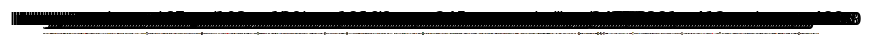

In [16]:

import imageio
import imageio.v3 as iio
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski
import skimage.transform as transform
import os

folder_path = "./dataset_cats_and_dogs/test/cats"  # Replace this with your folder path
file_list = os.listdir(folder_path)

images = []
for filename in file_list:
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):  # Ensure the path is a file, not a directory
        image = iio.imread(file_path)
        images.append(image)

import matplotlib.pyplot as plt

# Assuming 'images' contains a list of images

plt.figure(figsize=(10, 10))

for i, image in enumerate(images):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Image {i+1}")
plt.show()

# fig, ax = plt.subplots()
# plt.imshow(chair)


# # images = []
# # for file in Path("./dataset_cats_and_dogs/test/cats/").iterdir():
# #     if not file.is_file():
# #         continue
# #     images.append(iio.imread(file))

# resized_images = []
# grayscale_images = []
# for image in images:
#     # Convert the image to grayscale
#     grayscale_image = ski.color.rgb2gray(image)

#     # Resize the grayscale image to 128x128 pixels
#     resized_image = transform.resize(grayscale_image, (128, 128))

#     # Append the resized grayscale image to the list
#     resized_images.append(resized_image)
#     grayscale_images.append(grayscale_image)
    
# # Save the grayscale resized images using imageio
# for i, image in enumerate(resized_images):
#     filename = f"resized_image_{i}.jpg"
#     save_path = f"./dataset_cats_and_dogs/processed_images/{filename}"
#     # imageio.imwrite(uri=save_path, im=image)
#     imageio.imwrite(save_path, (image * 255).astype(np.uint8))

        
# # # Save the grayscale resized images using imageio
# # for i, image in enumerate(grayscale_resized_image_list):
# #     filename = f"file{i}.jpg"
# #     save_path = f"./dataset_cats_and_dogs/processed_images/{filename}"
# #     imageio.imwrite(save_path, (image * 255).astype(np.uint8))
    
# # Show one of the images using plt.imshow()
# plt.imshow(resized_images[10], cmap='gray')
# plt.axis('off')  # Hide axis labels
# plt.show()

In [ ]:
import imageio.v3 as iio
import ipympl
import matplotlib.pyplot as plt
import numpy as np
import skimage as ski

